In [1]:
import kitchen.ingredients as k
import dropkick as dk
from MILWRM.ST import *
from MILWRM.MxIF import *
import sys; sys.path.append("../../../utility_scripts/")
from visium_utils import deconvolve_cnmf

# some stuff to make this notebook work better with Scanpy
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from skimage import data, transform, io
from napari.utils.transforms import Affine

In [3]:
sc.set_figure_params(transparent=True, dpi_save=400)
sns.set_style("white")
sc.settings.figdir = "plots_patient/wholeslide/"

---
# WD86056 Sample 6723-KL-1

In [ ]:
a1 = sc.read("6723_1_WD86056_master.h5ad"); a1

In [ ]:
WD86056 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8.npz"); WD86056

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD86056.img.shape[1]:,:]

In [ ]:
WD86056_HE = img(img1, mask=WD86056.mask)
WD86056_HE.scale()
#WD86056_HE.img = WD86056_HE.img[::-1,::-1,:]
#WD86056_HE.mask = WD86056_HE.mask[::-1,::-1]

In [ ]:
p = WD86056_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT71397_WD86056_histology.png")

In [ ]:
WD86056_HE

In [ ]:
bg_img = WD86056_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD86056_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8_6723_1_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8_6723_1_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
shape1 * affine1[0,0]

In [ ]:
scalef_adata = a1.uns["spatial"]["6723_KL_1"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef = affine1[0,0]

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - (WD86056_HE.img.shape[1] / (scalef_adata/scalef))
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + (WD86056_HE.img.shape[0] / (scalef/scalef_adata))

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - ((a1.uns["spatial"]["6723_KL_1"]["images"]["hires"].shape[1] / scalef_adata) - (WD86056_HE.img.shape[1] / scalef))
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + ((a1.uns["spatial"]["6723_KL_1"]["images"]["hires"].shape[0] / scalef_adata) - (WD86056_HE.img.shape[0] / scalef))

In [ ]:
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 500

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * (2*scalef_adata/scalef)

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="cnv_score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD86056 Sample 6723-KL-2

In [ ]:
a2 = sc.read("6723_2_WD86056_master.h5ad"); a2

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8_6723_2_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8_6723_2_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
scalef_adata2 = a2.uns["spatial"]["6723_KL_2"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef2 = affine2[0,0]

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - (WD86056_HE.img.shape[1] / (scalef_adata/scalef))
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + (WD86056_HE.img.shape[0] / (scalef/scalef_adata))

In [ ]:
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - ((a2.uns["spatial"]["6723_KL_2"]["images"]["hires"].shape[1] / scalef_adata) - (WD86056_HE.img.shape[1] / scalef))
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2*((a2.uns["spatial"]["6723_KL_2"]["images"]["hires"].shape[0] / scalef_adata2) - (WD86056_HE.img.shape[0] / scalef2))

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 1500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * (2*scalef_adata2/scalef2)

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 1500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 500
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 200
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 20
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 500

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False
)

---
# WD86056 Sample 6723-KL-3

In [ ]:
a3 = sc.read("6723_3_WD86056_master.h5ad"); a3

In [ ]:
affine3 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8_6723_3_affine.csv",
    delimiter=",",
)
shape3 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86056/WD86056_downsample8_6723_3_shape.csv",
    delimiter=",",
)

In [ ]:
affine3

In [ ]:
shape3

In [ ]:
scalef_adata3 = a3.uns["spatial"]["6723_KL_3"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef3 = affine1[0,0]

In [ ]:
a3.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a3.obsm["spatial"]),
        np.zeros((a3.obsm["spatial"].shape[0],1))
    ]),
    affine3.T
)[:,:2]

In [ ]:
a3.obsm["spatial_ws"]

In [ ]:
(WD86056_HE.img.shape[1] / (scalef_adata3/scalef3))

In [ ]:
(WD86056_HE.img.shape[0] / (scalef_adata3/scalef3))

In [ ]:
a3.obsm["spatial_ws"][:,0] = a3.obsm["spatial_ws"][:,0] - (WD86056_HE.img.shape[1] / (scalef_adata3/scalef3))
a3.obsm["spatial_ws"][:,1] = a3.obsm["spatial_ws"][:,1] + (WD86056_HE.img.shape[0] / (scalef3/scalef_adata3))

In [ ]:
((a3.uns["spatial"]["6723_KL_3"]["images"]["hires"].shape[0] / scalef_adata3) - (WD86056_HE.img.shape[0] / scalef3))

In [ ]:
((a3.uns["spatial"]["6723_KL_3"]["images"]["hires"].shape[1] / scalef_adata3) - (WD86056_HE.img.shape[1] / scalef3))

In [ ]:
a3.obsm["spatial_ws"][:,0] = a3.obsm["spatial_ws"][:,0] + 2*((a3.uns["spatial"]["6723_KL_3"]["images"]["hires"].shape[1] / scalef_adata3) - (WD86056_HE.img.shape[1] / scalef3))
a3.obsm["spatial_ws"][:,1] = a3.obsm["spatial_ws"][:,1] + 2*((a3.uns["spatial"]["6723_KL_3"]["images"]["hires"].shape[0] / scalef_adata3) - (WD86056_HE.img.shape[0] / scalef3))

In [ ]:
a3.obsm["spatial_ws"] = a3.obsm["spatial_ws"] * (2*scalef_adata3/scalef3)

In [ ]:
a3.obsm["spatial_ws"]

In [ ]:
a3.obsm["spatial_ws"][:,1] = a3.obsm["spatial_ws"][:,1] + 1300
a3.obsm["spatial_ws"][:,0] = a3.obsm["spatial_ws"][:,0] + 1300

In [ ]:
sc.pl.spatial(
    a3,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False
)

---
# WD86056 Combined

In [ ]:
a_ws = a1.concatenate([a2,a3], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("PAT71397_WD86056_combined_ws.h5ad", compression="gzip")

---
### Replace old `.obs` metadata with new

In [ ]:
a_ws = sc.read("PAT71397_WD86056_combined_ws.h5ad")

In [ ]:
del a_ws.obs #.drop(columns=['A1_SM', 'A2_MUC', 'A3_Adaptive', 'A4_Endocrine', 'A5_Cytotoxic', 'A6_DPEP1', 'A7_ABS', 'A8_Innate'], inplace=True)

In [ ]:
a1 = sc.read("6723_1_WD86056_master.h5ad")
a2 = sc.read("6723_2_WD86056_master.h5ad")
a3 = sc.read("6723_3_WD86056_master.h5ad")

In [ ]:
a = a1.concatenate([a2,a3], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71397_WD86056_cnv_leiden.png"
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=signatures,
    img=bg_img,
    ncols=5,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71397_WD86056_signatures.png"
)

In [ ]:
et = ['A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem']

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=et,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71397_WD86056_archetypes.png",
    ncols=4,
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CytoTRACE","cnv_score","cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86056_HE.img.shape[1],0,WD86056_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71397_WD86056_cnv_progression.png",
)

---
# WD86055 Sample 6723-KL-4

In [ ]:
a4 = sc.read("6723_4_WD86055_master.h5ad"); a4

In [ ]:
WD86055 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD86055/WD86055_downsample8.npz"); WD86055

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD86055/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD86055_HE = img(img1, mask=WD86055.mask)
WD86055_HE.scale()
WD86055_HE.img = WD86055_HE.img[::-1,::-1,:]
WD86055_HE.mask = WD86055_HE.mask[::-1,::-1]

In [ ]:
p = WD86055_HE.show(RGB=True)

In [ ]:
bg_img = WD86055_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD86055_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86055/WD86055_downsample8_6723_4_affine.csv",
    delimiter=",",
)
shape4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD86055/WD86055_downsample8_6723_4_shape.csv",
    delimiter=",",
)

In [ ]:
affine4

In [ ]:
shape4

In [ ]:
scalef_adata4 = a4.uns["spatial"]["6723_KL_4"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef4 = affine4[0,0]

In [ ]:
scalef4

In [ ]:
scalef_adata4

In [ ]:
a4.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a4.obsm["spatial"]),
        np.zeros((a4.obsm["spatial"].shape[0],1))
    ]),
    affine4.T
)[:,:2]

In [ ]:
a4.obsm["spatial_ws"]

In [ ]:
#a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] - ((a4.uns["spatial"]["6723_KL_4"]["images"]["hires"].shape[1] / scalef_adata4) - (WD86055_HE.img.shape[1] / scalef4))
a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + ((a4.uns["spatial"]["6723_KL_4"]["images"]["hires"].shape[0] / scalef_adata4) - (WD86055_HE.img.shape[0] / scalef4))

In [ ]:
a4.obsm["spatial_ws"] = a4.obsm["spatial_ws"] * (scalef_adata4/scalef4)

In [ ]:
a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + 1300
#a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] + 1300

In [ ]:
a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + 500
a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] - 300

In [ ]:
a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + 500
a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] - 300

In [ ]:
a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + 300
a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] - 300

In [ ]:
a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + 300
a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] - 100

In [ ]:
#a4.obsm["spatial_ws"][:,1] = a4.obsm["spatial_ws"][:,1] + 300
a4.obsm["spatial_ws"][:,0] = a4.obsm["spatial_ws"][:,0] - 100

In [ ]:
a4.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a4,
    basis="spatial_ws",
    color="cnv_score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86055_HE.img.shape[1],0,WD86055_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

In [ ]:
# flip coords in second sample
a4.obsm["spatial_ws"][:,0] = WD86055_HE.img.shape[1] - a4.obsm["spatial_ws"][:,0]
a4.obsm["spatial_ws"][:,1] = WD86055_HE.img.shape[0] - a4.obsm["spatial_ws"][:,1]

In [ ]:
# flip image back
WD86055_HE.img = WD86055_HE.img[::-1,::-1,:]
WD86055_HE.mask = WD86055_HE.mask[::-1,::-1]

bg_img = WD86055_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD86055_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD86055_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT71397_WD86055_histology.png")

In [ ]:
a4.write("PAT71397_WD86055_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a4 = sc.read("PAT71397_WD86055_combined_ws.h5ad")

In [ ]:
del a4.obs

In [ ]:
a4_normal = sc.read("6723_4_WD86055_master.h5ad")

In [ ]:
a4.obs = a4.obs.merge(a4_normal.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a4,
    basis="spatial_ws",
    color=["cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD86055_HE.img.shape[1],0,WD86055_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    #save="_PAT71397_WD86055_cnv_leiden.png"
)

---
# WD87482 Sample 7003-AS-7

In [ ]:
a1 = sc.read("7003_7_WD87482_master.h5ad"); a1

In [ ]:
WD87482 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/WD87482_downsample8.npz"); WD87482

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD87482.img.shape[1]:,:]

In [ ]:
WD87482_HE = img(img1, mask=WD87482.mask)
WD87482_HE.scale()
WD87482_HE.img = WD87482_HE.img[::-1,::-1,:]
WD87482_HE.mask = WD87482_HE.mask[::-1,::-1]

In [ ]:
WD87482_HE

In [ ]:
bg_img = WD87482_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD87482_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD87482_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT73899_histology.png")

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/WD87482_downsample8_7003_7_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/WD87482_downsample8_7003_7_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
shape1 * affine1[0,0]

In [ ]:
scalef_adata1 = a1.uns["spatial"]["7003_AS_7"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef1 = affine1[0,0]

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * (2*scalef_adata1/scalef1)

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 1000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 800

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 500
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 100

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 300
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 200

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 200
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 200

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="cnv_score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87482_HE.img.shape[1],0,WD87482_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD87482 Sample 7003-AS-8

In [ ]:
a2 = sc.read("7003_8_WD87482_master.h5ad"); a2

In [ ]:
WD87482 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/WD87482_downsample8.npz"); WD87482

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD87482.img.shape[1]:,:]

In [ ]:
WD87482_HE = img(img1, mask=WD87482.mask)
WD87482_HE.scale()
#WD87482_HE.img = WD87482_HE.img[::-1,::-1,:]
#WD87482_HE.mask = WD87482_HE.mask[::-1,::-1]

In [ ]:
WD87482_HE

In [ ]:
bg_img = WD87482_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD87482_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD87482_HE.show(RGB=True, mask_out=False)#, save_to="figures/show_PAT73899_histology.png")

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/WD87482_downsample8_7003_8_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87482/WD87482_downsample8_7003_8_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
scalef_adata2 = a2.uns["spatial"]["7003_AS_8"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef2 = affine2[0,0]

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * (2*scalef_adata2/scalef2)

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 1500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 50
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 1500

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87482_HE.img.shape[1],0,WD87482_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD87482 Combined

In [ ]:
# flip coords in second sample
a2.obsm["spatial_ws"][:,0] = WD87482_HE.img.shape[1] - a2.obsm["spatial_ws"][:,0]
a2.obsm["spatial_ws"][:,1] = WD87482_HE.img.shape[0] - a2.obsm["spatial_ws"][:,1]

In [ ]:
a_ws = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("PAT73899_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("PAT73899_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("7003_7_WD87482_master.h5ad")
a2 = sc.read("7003_8_WD87482_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87482_HE.img.shape[1],0,WD87482_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT73899_cnv_leiden.png"
)

---
# WD87480 Sample 7003-AS-5

In [ ]:
a1 = sc.read("7003_5_WD87480_master.h5ad"); a1

In [ ]:
WD87480 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/WD87480_downsample8.npz"); WD87480

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD87480.img.shape[1]:,:]

In [ ]:
WD87480_HE = img(img1, mask=WD87480.mask)
WD87480_HE.scale()
WD87480_HE.img = WD87480_HE.img[::-1,::-1,:]
WD87480_HE.mask = WD87480_HE.mask[::-1,::-1]

In [ ]:
WD87480_HE

In [ ]:
bg_img = WD87480_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD87480_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD87480_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT71662_histology.png")

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/WD87480_downsample8_7003_5_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/WD87480_downsample8_7003_5_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
scalef_adata1 = a1.uns["spatial"]["7003_AS_5"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef1 = affine1[0,0]

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * (1.45*scalef_adata1/scalef1)

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 950
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 500

In [ ]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 950
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 100

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 50
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 100

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="pathology_annotation",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87480_HE.img.shape[1],0,WD87480_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD87480 Sample 7003-AS-6

In [ ]:
a2 = sc.read("7003_6_WD87480_master.h5ad"); a2

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD87480.img.shape[1]:,:]

In [ ]:
WD87480_HE = img(img1, mask=WD87480.mask)
WD87480_HE.scale()
#WD87480_HE.img = WD87480_HE.img[::-1,::-1,:]
#WD87480_HE.mask = WD87480_HE.mask[::-1,::-1]

In [ ]:
WD87480_HE

In [ ]:
bg_img = WD87480_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD87480_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD87480_HE.show(RGB=True, mask_out=False)#, save_to="figures/show_WD87480_histology.png")

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/WD87480_downsample8_7003_6_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/WD87480_downsample8_7003_6_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
scalef_adata2 = a2.uns["spatial"]["7003_AS_6"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef2 = affine2[0,0]

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * (1.45*scalef_adata2/scalef2)

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 500

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 500

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 50
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 50

In [ ]:
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 50
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 200

In [ ]:
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 50
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 100

In [ ]:
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 50
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 50

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 50
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 50

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
WD87480_HE.img.shape

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87480_HE.img.shape[1],0,WD87480_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD87480 Combined

In [ ]:
# flip coords in second sample
a2.obsm["spatial_ws"][:,0] = WD87480_HE.img.shape[1] - a2.obsm["spatial_ws"][:,0]
a2.obsm["spatial_ws"][:,1] = WD87480_HE.img.shape[0] - a2.obsm["spatial_ws"][:,1]

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87480/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD87480.img.shape[1]:,:]

In [ ]:
WD87480_HE = img(img1, mask=WD87480.mask)
WD87480_HE.scale()
WD87480_HE.img = WD87480_HE.img[::-1,::-1,:]
WD87480_HE.mask = WD87480_HE.mask[::-1,::-1]

In [ ]:
WD87480_HE

In [ ]:
bg_img = WD87480_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD87480_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
a_ws = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("PAT71662_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("PAT71662_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("7003_5_WD87480_master.h5ad")
a2 = sc.read("7003_6_WD87480_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87480_HE.img.shape[1],0,WD87480_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71662_cnv_leiden.png"
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=signatures,
    ncols=5,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87480_HE.img.shape[1],0,WD87480_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71662_signatures.png"
)

In [ ]:
et = ['A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem']

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=et,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87480_HE.img.shape[1],0,WD87480_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71662_archetypes.png",
    ncols=4,
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CytoTRACE","cnv_score","cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87480_HE.img.shape[1],0,WD87480_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT71662_cnv_progression.png",
)

---
# WD85806 Sample 7003-AS-3

In [ ]:
a1 = sc.read("7003_3_WD85806_master.h5ad"); a1

In [ ]:
WD85806 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/WD85806_downsample8.npz"); WD85806

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD85806.img.shape[1]:,:]

In [ ]:
WD85806_HE = img(img1, mask=WD85806.mask)
WD85806_HE.scale()
WD85806_HE.img = WD85806_HE.img[::-1,::-1,:]
WD85806_HE.mask = WD85806_HE.mask[::-1,::-1]

In [ ]:
WD85806_HE

In [ ]:
bg_img = WD85806_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD85806_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD85806_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT73458_histology.png")

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/WD85806_downsample8_7003_3_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/WD85806_downsample8_7003_3_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
scalef_adata1 = a1.uns["spatial"]["7003_AS_3"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef_adata1

In [ ]:
scalef1 = affine1[0,0]

In [ ]:
scalef1

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * (scalef_adata1*1.9)#(scalef_adata1/scalef1)

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 200
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 7000

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 300
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 7000

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 200
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 100

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 50
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 100

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 50
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 50

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="pathology_annotation",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD85806_HE.img.shape[1],0,WD85806_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD85806 Sample 7003-AS-4

In [ ]:
a2 = sc.read("7003_4_WD85806_master.h5ad"); a2

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1 = img1[1::,:WD85806.img.shape[1]:,:]

In [ ]:
WD85806_HE = img(img1, mask=WD85806.mask)
WD85806_HE.scale()
#WD87480_HE.img = WD87480_HE.img[::-1,::-1,:]
#WD87480_HE.mask = WD87480_HE.mask[::-1,::-1]

In [ ]:
WD85806_HE

In [ ]:
bg_img2 = WD85806_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img2[:, :, i][WD85806_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD85806_HE.show(RGB=True, mask_out=False)#, save_to="figures/show_WD87480_histology.png")

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/WD85806_downsample8_7003_4_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD85806/WD85806_downsample8_7003_4_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
scalef_adata2 = a2.uns["spatial"]["7003_AS_4"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef2 = affine2[0,0]

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * (scalef_adata1*1.9)#(scalef_adata1/scalef1)

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 500
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 800

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 200
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 1000

In [ ]:
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 200
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 400

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 100
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 200

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img2,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD85806_HE.img.shape[1],0,WD85806_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD85806 Combined

In [ ]:
# flip coords in second sample
a2.obsm["spatial_ws"][:,0] = WD85806_HE.img.shape[1] - a2.obsm["spatial_ws"][:,0]
a2.obsm["spatial_ws"][:,1] = WD85806_HE.img.shape[0] - a2.obsm["spatial_ws"][:,1]

In [ ]:
a_ws = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("PAT73458_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("PAT73458_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("7003_3_WD85806_master.h5ad")
a2 = sc.read("7003_4_WD85806_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD85806_HE.img.shape[1],0,WD85806_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT73458_cnv_leiden.png"
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=signatures,
    ncols=5,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD85806_HE.img.shape[1],0,WD85806_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT73458_signatures.png"
)

In [ ]:
et = ['A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem']

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=et,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD85806_HE.img.shape[1],0,WD85806_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT73458_archetypes.png",
    ncols=4,
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CytoTRACE","cnv_score","cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD85806_HE.img.shape[1],0,WD85806_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT73458_cnv_progression.png",
)

---
# WD87478 Sample 7003-AS-1

In [ ]:
a1 = sc.read("7003_1_WD87478_master.h5ad"); a1

In [ ]:
WD87478 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/WD87478_downsample8.npz"); WD87478

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
img1.shape

In [ ]:
WD87478_HE = img(img1, mask=WD87478.mask)
WD87478_HE.scale()
WD87478_HE.img = WD87478_HE.img[::-1,::-1,:]
WD87478_HE.mask = WD87478_HE.mask[::-1,::-1]

In [ ]:
WD87478_HE

In [ ]:
bg_img = WD87478_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD87478_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD87478_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT74143_histology.png")

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/WD87478_downsample8_7003_1_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/WD87478_downsample8_7003_1_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
scalef_adata1 = a1.uns["spatial"]["7003_AS_1"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef_adata1

In [ ]:
scalef1 = affine1[0,0]

In [ ]:
scalef1

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * (scalef_adata1*2.2)#(scalef_adata1/scalef1)

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 600
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 4350

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 100
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 50

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 200
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 50

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 100
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 50

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 50
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 50

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="pathology_annotation",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87478_HE.img.shape[1],0,WD87478_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD87478 Sample 7003-AS-2

In [ ]:
a2 = sc.read("7003_2_WD87478_master.h5ad"); a2

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD87478_HE = img(img1, mask=WD87478.mask)
WD87478_HE.scale()
WD87478_HE.img = WD87478_HE.img[::-1,::-1,:]
WD87478_HE.mask = WD87478_HE.mask[::-1,::-1]

In [ ]:
WD87478_HE

In [ ]:
bg_img2 = WD87478_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img2[:, :, i][WD87478_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/WD87478_downsample8_7003_2_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD87478/WD87478_downsample8_7003_2_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
scalef_adata2 = a2.uns["spatial"]["7003_AS_2"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef2 = affine2[0,0]

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * (scalef_adata1*2.2)#(scalef_adata1/scalef1)

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 1000
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 800

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 600
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 200

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img2,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87478_HE.img.shape[1],0,WD87478_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD87478 Combined

In [ ]:
a_ws = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("PAT74143_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("PAT74143_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("7003_1_WD87478_master.h5ad")
a2 = sc.read("7003_2_WD87478_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87478_HE.img.shape[1],0,WD87478_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT74143_cnv_leiden.png"
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CytoTRACE","cnv_score","cnv_leiden"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87478_HE.img.shape[1],0,WD87478_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT74143_cnv_progression.png",
)

In [ ]:
et = ['A1_Innate', 'A2_Cytotoxic', 'A3_Endocrine', 'A4_MUC', 'A5_ABS', 'A6_SM', 'A7_Adaptive', 'A8_Stem']

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=et,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87478_HE.img.shape[1],0,WD87478_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT74143_archetypes.png",
    ncols=4,
)

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=signatures,
    ncols=5,
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD87478_HE.img.shape[1],0,WD87478_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT74143_signatures.png"
)

---
# WD84602 Sample 8270-AS-6

In [ ]:
a1 = sc.read("datasets/8270_6_WD84602_master.h5ad"); a1

In [ ]:
WD84602 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD84602/WD84602_downsample8.npz"); WD84602

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD84602/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD84602_HE = img(img1, mask=WD84602.mask)
WD84602_HE.scale()
#WD84602_HE.img = WD84602_HE.img[::-1,::-1,:]
#WD84602_HE.mask = WD84602_HE.mask[::-1,::-1]

In [ ]:
WD84602_HE

In [ ]:
bg_img = WD84602_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD84602_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD84602_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT30884_histology.png")

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84602/WD84602_downsample8_8270_6_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84602/WD84602_downsample8_8270_6_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
shape1 * affine1[0,0]

In [ ]:
scalef_adata1 = a1.uns["spatial"]["8270_AS_6"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef1 = affine1[0,0]

In [ ]:
scalef_adata1

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * 0.8

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 200
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 900

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 2500
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 300

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 1000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 200

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 400
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 200

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 100
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 300

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84602_HE.img.shape[1],0,WD84602_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD84602 Sample 8270-AS-7

In [ ]:
a2 = sc.read("datasets/8270_7_WD84602_master.h5ad"); a2

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84602/WD84602_downsample8_8270_7_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84602/WD84602_downsample8_8270_7_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * 0.8

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 500

In [ ]:
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 1500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 1500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 500
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 200
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 100
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84602_HE.img.shape[1],0,WD84602_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD84602 Combined

In [ ]:
a_ws = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("datasets/PAT30884_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("datasets/PAT30884_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("datasets/8270_6_WD84602_master.h5ad")
a2 = sc.read("datasets/8270_7_WD84602_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CNV Clone"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84602_HE.img.shape[1],0,WD84602_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT30884_cnv_leiden.png"
)

---
# WD84216 Sample 8270-AS-11

In [ ]:
a1 = sc.read("datasets/8270_11_WD84216_master.h5ad"); a1

In [ ]:
WD84216 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD84216/WD84216_downsample8.npz"); WD84216

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD84216/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD84216_HE = img(img1, mask=WD84216.mask)
WD84216_HE.scale()
WD84216_HE.img = WD84216_HE.img[::-1,::-1,:]
WD84216_HE.mask = WD84216_HE.mask[::-1,::-1]

In [ ]:
WD84216_HE

In [ ]:
bg_img = WD84216_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD84216_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
p = WD84216_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT54273_histology.png")

In [ ]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84216/WD84216_downsample8_8270_11_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84216/WD84216_downsample8_8270_11_shape.csv",
    delimiter=",",
)

In [ ]:
affine1

In [ ]:
shape1

In [ ]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [ ]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * 0.8

In [ ]:
a1.obsm["spatial_ws"]

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 2000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 500

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 3000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 300

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 1500
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 500

In [ ]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 400
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 200

In [ ]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 400
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 150

In [ ]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 400
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 100

In [ ]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84216_HE.img.shape[1],0,WD84216_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD84216 Sample 8270-AS-12

In [ ]:
a2 = sc.read("datasets/8270_12_WD84216_master.h5ad"); a2

In [ ]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84216/WD84216_downsample8_8270_12_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84216/WD84216_downsample8_8270_12_shape.csv",
    delimiter=",",
)

In [ ]:
affine2

In [ ]:
shape2

In [ ]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * 0.8

In [ ]:
a2.obsm["spatial_ws"]

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2000

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2000

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2000

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 300
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 100

In [ ]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 100
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 50

In [ ]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84216_HE.img.shape[1],0,WD84216_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# WD84216 Combined

In [ ]:
a_ws = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws

In [ ]:
a_ws.write("datasets/PAT54273_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("datasets/PAT54273_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("datasets/8270_11_WD84216_master.h5ad")
a2 = sc.read("datasets/8270_12_WD84216_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CNV Clone"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84216_HE.img.shape[1],0,WD84216_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_PAT54273_cnv_leiden.png"
)

---
# PAT33430 Block WD84221 Sample 7794-KL-3

In [ ]:
a = sc.read("datasets/7794_3_WD84221_master.h5ad"); a

In [ ]:
WD84221 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD84221/WD84221_downsample8.npz"); WD84221

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD84221/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD84221_HE = img(img1, mask=WD84221.mask)
WD84221_HE.scale()
#WD84221_HE.img = WD84221_HE.img[::-1,::-1,:]
#WD84221_HE.mask = WD84221_HE.mask[::-1,::-1]

In [ ]:
p = WD84221_HE.show(RGB=True)

In [ ]:
bg_img = WD84221_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD84221_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84221/WD84221_downsample8_7794_3_affine.csv",
    delimiter=",",
)
shape4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84221/WD84221_downsample8_7794_3_shape.csv",
    delimiter=",",
)

In [ ]:
affine4

In [ ]:
shape4

In [ ]:
scalef_adata4 = a.uns["spatial"]["7794_AS_3"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef4 = affine4[0,0]

In [ ]:
scalef4

In [ ]:
scalef_adata4

In [ ]:
a.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a.obsm["spatial"]),
        np.zeros((a.obsm["spatial"].shape[0],1))
    ]),
    affine4.T
)[:,:2]

In [ ]:
a.obsm["spatial_ws"] = a.obsm["spatial_ws"] * 0.45

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 2000
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 500

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 1000
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 500

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 500
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 500

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 50
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 50

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 25
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 25

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 25
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 25

In [ ]:
#a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 25
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 50

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 200
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 100

In [ ]:
#a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 25
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 50

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 25
#a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 50

In [ ]:
sc.pl.spatial(
    a,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84221_HE.img.shape[1],0,WD84221_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

In [ ]:
p = WD84221_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT33430_histology.png")

In [ ]:
a.write("PAT33430_WD84221_combined_ws.h5ad", compression="gzip")

---
# PAT59460 Block WD84226 Sample 8270-AS-10

In [ ]:
a = sc.read("datasets/8270_10_WD84226_master.h5ad"); a

In [ ]:
WD84226 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD84226/WD84226_downsample8.npz"); WD84226

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD84226/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD84226_HE = img(img1, mask=WD84226.mask)
WD84226_HE.scale()
WD84226_HE.img = WD84226_HE.img[::-1,::-1,:]
WD84226_HE.mask = WD84226_HE.mask[::-1,::-1]

In [ ]:
p = WD84226_HE.show(RGB=True)

In [ ]:
bg_img = WD84226_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD84226_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84226/WD84226_downsample8_8270_10_affine.csv",
    delimiter=",",
)
shape4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84226/WD84226_downsample8_8270_10_shape.csv",
    delimiter=",",
)

In [ ]:
affine4

In [ ]:
shape4

In [ ]:
scalef_adata4 = a.uns["spatial"]["8270_AS_10"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef4 = affine4[0,0]

In [ ]:
scalef4

In [ ]:
scalef_adata4

In [ ]:
a.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a.obsm["spatial"]),
        np.zeros((a.obsm["spatial"].shape[0],1))
    ]),
    affine4.T
)[:,:2]

In [ ]:
a.obsm["spatial_ws"] = a.obsm["spatial_ws"] * 0.85

In [ ]:
a.obsm["spatial_ws"]

In [ ]:
#a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 2000
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 2000

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 500
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 1000

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 200
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 1000

In [ ]:
#a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 200
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 1000

In [ ]:
#a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 200
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 200

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 300
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 100

In [ ]:
sc.pl.spatial(
    a,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84226_HE.img.shape[1],0,WD84226_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

In [ ]:
p = WD84226_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT59460_histology.png")

In [ ]:
a.write("PAT59460_WD84226_combined_ws.h5ad", compression="gzip")

---
# PAT59667 Block WD84596 Sample 8270-AS-8

In [ ]:
a = sc.read("datasets/8270_8_WD84596_master.h5ad"); a

In [ ]:
WD84596 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD84596/WD84596_downsample8.npz"); WD84596

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD84596/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD84596_HE = img(img1, mask=WD84596.mask)
WD84596_HE.scale()
WD84596_HE.img = WD84596_HE.img[::-1,::-1,:]
WD84596_HE.mask = WD84596_HE.mask[::-1,::-1]

In [ ]:
p = WD84596_HE.show(RGB=True)

In [ ]:
bg_img = WD84596_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD84596_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84596/WD84596_downsample8_8270_8_affine.csv",
    delimiter=",",
)
shape4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84596/WD84596_downsample8_8270_8_shape.csv",
    delimiter=",",
)

In [ ]:
affine4

In [ ]:
shape4

In [ ]:
scalef_adata4 = a.uns["spatial"]["8270_AS_8"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef4 = affine4[0,0]

In [ ]:
scalef4

In [ ]:
scalef_adata4

In [ ]:
a.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a.obsm["spatial"]),
        np.zeros((a.obsm["spatial"].shape[0],1))
    ]),
    affine4.T
)[:,:2]

In [ ]:
a.obsm["spatial_ws"] = a.obsm["spatial_ws"] * 0.77

In [ ]:
a.obsm["spatial_ws"]

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 3000
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 4500

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 200
#a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 4500

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 100
#a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 4500

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] - 150
#a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 4500

In [ ]:
sc.pl.spatial(
    a,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84596_HE.img.shape[1],0,WD84596_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

In [ ]:
p = WD84596_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT59667_histology.png")

In [ ]:
a.write("PAT59667_WD84596_combined_ws.h5ad", compression="gzip")

---
# PAT59600 Block WD84594 Sample 8270-AS-9

In [ ]:
a = sc.read("datasets/8270_9_WD84594_master.h5ad"); a

In [ ]:
WD84594 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/WD84594/WD84594_downsample8.npz"); WD84594

In [ ]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/WD84594/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [ ]:
WD84594_HE = img(img1, mask=WD84594.mask)
WD84594_HE.scale()
#WD84594_HE.img = WD84594_HE.img[::-1,::-1,:]
#WD84594_HE.mask = WD84594_HE.mask[::-1,::-1]

In [ ]:
p = WD84594_HE.show(RGB=True)

In [ ]:
bg_img = WD84594_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][WD84594_HE.mask == 0] = 1.0  # area outside mask 1.0

In [ ]:
affine4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84594/WD84594_downsample8_8270_9_affine.csv",
    delimiter=",",
)
shape4 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/WD84594/WD84594_downsample8_8270_9_shape.csv",
    delimiter=",",
)

In [ ]:
affine4

In [ ]:
shape4

In [ ]:
scalef_adata4 = a.uns["spatial"]["8270_AS_9"]["scalefactors"]["tissue_hires_scalef"]

In [ ]:
scalef4 = affine4[0,0]

In [ ]:
scalef4

In [ ]:
scalef_adata4

In [ ]:
a.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a.obsm["spatial"]),
        np.zeros((a.obsm["spatial"].shape[0],1))
    ]),
    affine4.T
)[:,:2]

In [ ]:
a.obsm["spatial_ws"] = a.obsm["spatial_ws"] * 0.8

In [ ]:
a.obsm["spatial_ws"]

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 2000
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 1000

In [ ]:
a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 500
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] - 500

In [ ]:
#a.obsm["spatial_ws"][:,0] = a.obsm["spatial_ws"][:,0] + 500
a.obsm["spatial_ws"][:,1] = a.obsm["spatial_ws"][:,1] + 1000

In [ ]:
sc.pl.spatial(
    a,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,WD84594_HE.img.shape[1],0,WD84594_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

In [ ]:
p = WD84594_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_PAT59600_histology.png")

In [ ]:
a.write("PAT59600_WD84594_combined_ws.h5ad", compression="gzip")

---
# SG00001 Sample 8899-AS-1

In [5]:
a1 = sc.read("datasets/8899_1_SG00001_master.h5ad"); a1

AnnData object with n_obs × n_vars = 4116 × 19347
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [6]:
SG00001 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/SG00001/SG00001_downsample8.npz"); SG00001

Loading img object from /mnt/500gb_ssd/home/cody/images/MxIF/SG00001/SG00001_downsample8.npz...


img object with <class 'numpy.ndarray'> of float64 and shape 9195px x 11019px
24 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 9195px x 11019px

In [7]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/SG00001/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [8]:
SG00001_HE = img(img1, mask=SG00001.mask)
SG00001_HE.scale()
#WD84602_HE.img = WD84602_HE.img[::-1,::-1,:]
#WD84602_HE.mask = WD84602_HE.mask[::-1,::-1]

In [9]:
SG00001

img object with <class 'numpy.ndarray'> of float64 and shape 9195px x 11019px
24 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 9195px x 11019px

In [10]:
bg_img = SG00001_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][SG00001_HE.mask == 0] = 1.0  # area outside mask 1.0

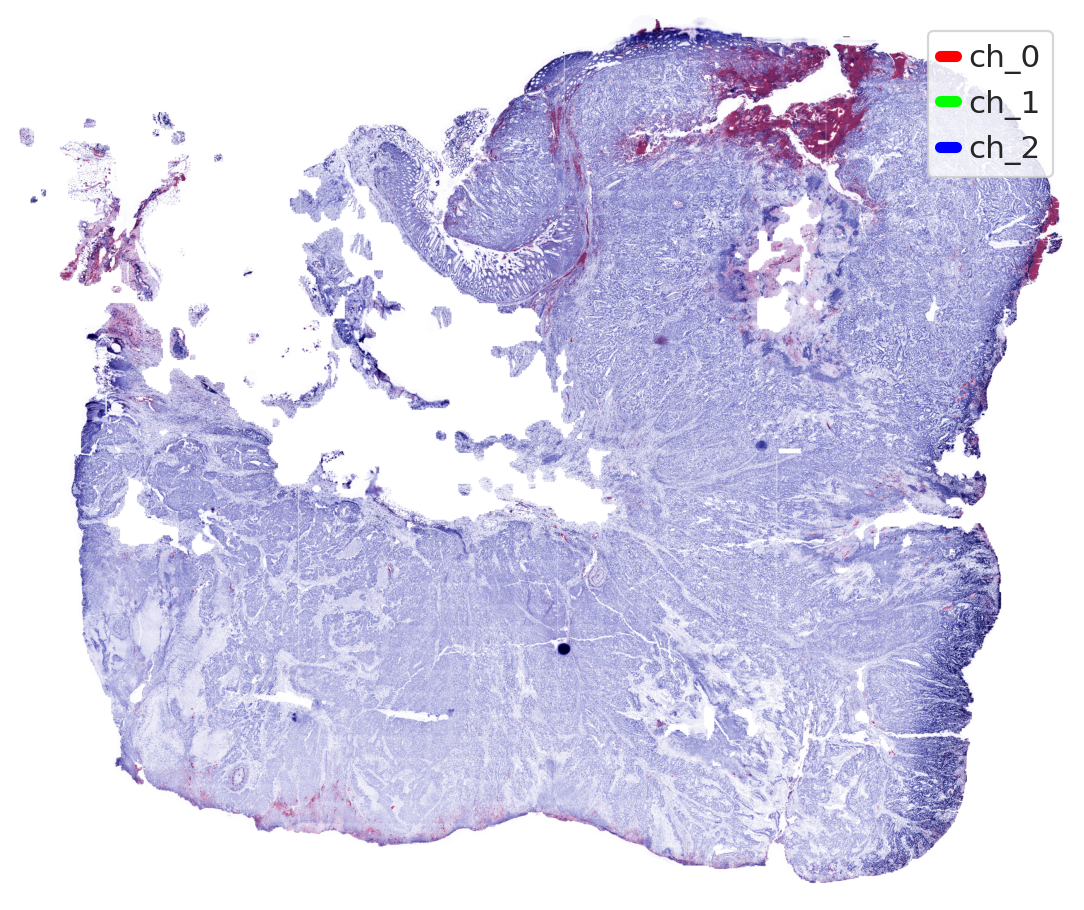

In [11]:
p = SG00001_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_SG00001_histology.png")

In [12]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00001/SG00001_downsample8_8899_1_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00001/SG00001_downsample8_8899_2_shape.csv",
    delimiter=",",
)

In [13]:
affine1

array([[ 1.06568008e-01,  9.94305416e-01,  9.10117667e+02],
       [-9.94305416e-01,  1.06568008e-01,  8.49400249e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [14]:
shape1

array([3.216e+03, 4.527e+03, 3.000e+00])

In [15]:
shape1 * affine1[0,0]

array([3.42722714e+02, 4.82433373e+02, 3.19704025e-01])

In [16]:
scalef_adata1 = a1.uns["spatial"]["8899_AS_1"]["scalefactors"]["tissue_hires_scalef"]

In [17]:
scalef1 = affine1[0,0]

In [18]:
scalef_adata1

0.41084635

In [26]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [21]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * 0.8

In [28]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 200
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 3500

In [31]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 200
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 5500

In [34]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 200
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 5500

In [37]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 500
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 5500

In [38]:
a1.obsm["spatial_ws"]

array([[4661.5154385 , 5724.20290526],
       [2498.61985262, 7437.46373904],
       [4477.40543964, 6315.952437  ],
       ...,
       [2286.00236465, 5780.3690514 ],
       [2878.68174302, 5777.51345079],
       [4302.11724791, 6478.19623454]])

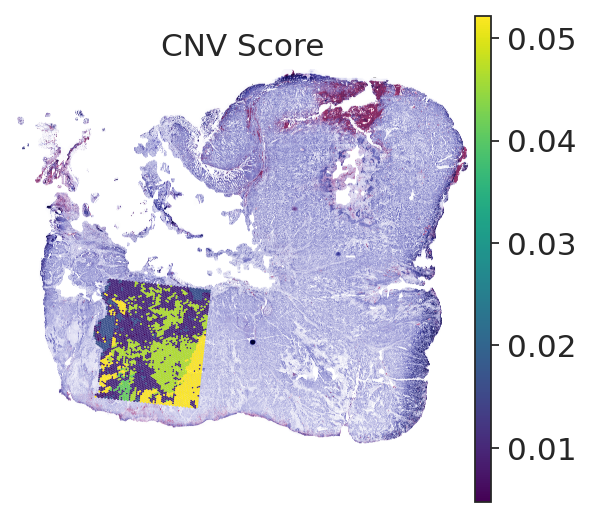

In [39]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00001_HE.img.shape[1],0,SG00001_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00001 Sample 8899-AS-2

In [40]:
a2 = sc.read("datasets/8899_2_SG00001_master.h5ad"); a2

AnnData object with n_obs × n_vars = 4078 × 19225
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [41]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00001/SG00001_downsample8_8899_2_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00001/SG00001_downsample8_8899_2_shape.csv",
    delimiter=",",
)

In [42]:
affine2

array([[ 1.35873459e-02, -9.99907688e-01,  1.06071877e+04],
       [ 9.99907688e-01,  1.35873459e-02,  4.61029451e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [43]:
shape2

array([3.216e+03, 4.527e+03, 3.000e+00])

In [49]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [ ]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * 0.8

In [50]:
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2000
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2000

In [53]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 8000

In [56]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 800
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 800

In [59]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 500
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [62]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 200
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [65]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 100
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 100

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 100
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [66]:
a2.obsm["spatial_ws"]

array([[9288.51750005, 6576.40690363],
       [7456.77303508, 7932.42062592],
       [9665.97486703, 8447.4509801 ],
       ...,
       [9702.60151275, 8198.9303797 ],
       [9113.56632915, 8273.94072886],
       [7612.31272748, 7750.29044148]])

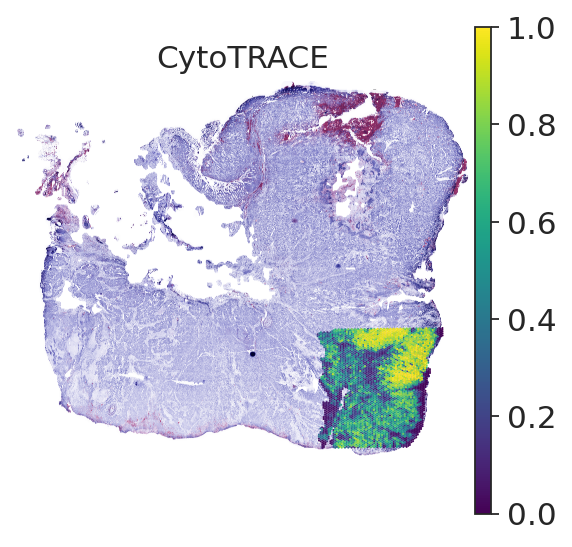

In [67]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00001_HE.img.shape[1],0,SG00001_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00001 Combined

In [68]:
a_ws = a1.concatenate([a2], fill_value=0)

In [69]:
a_ws

AnnData object with n_obs × n_vars = 8194 × 19190
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [70]:
a_ws.write("datasets/SG00001_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("datasets/SG00001_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("datasets/8899_1_SG00001_master.h5ad")
a2 = sc.read("datasets/8899_2_SG00001_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

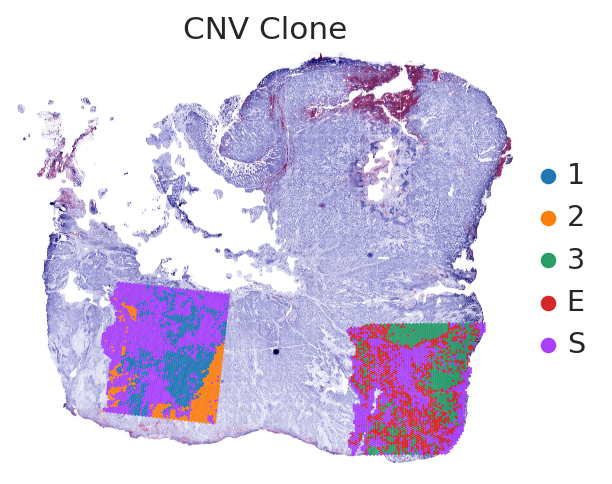

In [71]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CNV Clone"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00001_HE.img.shape[1],0,SG00001_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_SG00001_cnv_leiden.png"
)

---
# SG00002 Sample 8899-AS-3

In [196]:
a1 = sc.read("datasets/8899_3_SG00002_master.h5ad"); a1

AnnData object with n_obs × n_vars = 1727 × 19355
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [197]:
SG00002 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/SG00002/SG00002_downsample8.npz"); SG00002

Loading img object from /mnt/500gb_ssd/home/cody/images/MxIF/SG00002/SG00002_downsample8.npz...


img object with <class 'numpy.ndarray'> of float64 and shape 7795px x 11912px
24 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 7795px x 11912px

In [198]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/SG00002/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [199]:
SG00002_HE = img(img1, mask=SG00002.mask)
SG00002_HE.scale()
#WD84602_HE.img = WD84602_HE.img[::-1,::-1,:]
#WD84602_HE.mask = WD84602_HE.mask[::-1,::-1]

In [200]:
SG00002

img object with <class 'numpy.ndarray'> of float64 and shape 7795px x 11912px
24 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 7795px x 11912px

In [201]:
bg_img = SG00002_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][SG00002_HE.mask == 0] = 1.0  # area outside mask 1.0

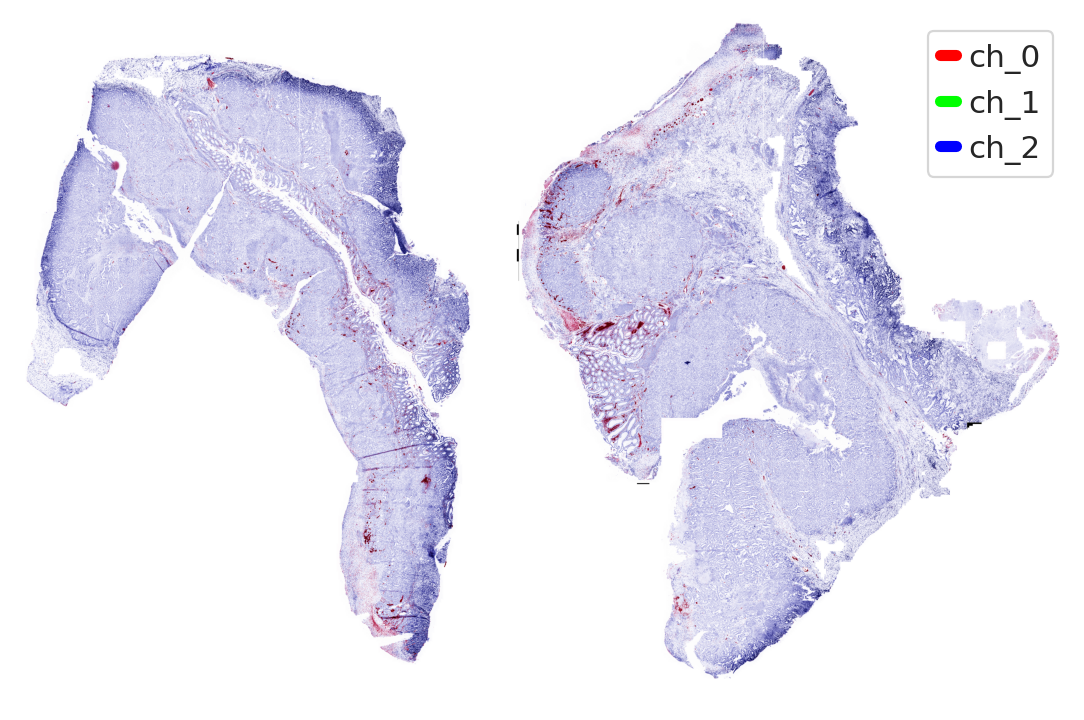

In [202]:
p = SG00002_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_SG00002_histology.png")

In [203]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00002/SG00002_downsample8_8899_3_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00002/SG00002_downsample8_8899_3_shape.csv",
    delimiter=",",
)

In [204]:
affine1

array([[ 1.62137906e-01, -9.86768108e-01,  5.72086793e+03],
       [ 9.86768108e-01,  1.62137906e-01,  4.08231587e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [205]:
shape1

array([3.044e+03, 3.614e+03, 3.000e+00])

In [206]:
shape1 * affine1[0,0]

array([4.93547786e+02, 5.85966393e+02, 4.86413719e-01])

In [207]:
scalef_adata1 = a1.uns["spatial"]["8899_AS_3"]["scalefactors"]["tissue_hires_scalef"]

In [208]:
scalef1 = affine1[0,0]

In [209]:
scalef_adata1

0.44802868

In [210]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [215]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * 0.8

In [212]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 2500
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 300

In [216]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 4000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 4000

In [219]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 300
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] - 200

In [ ]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 100
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 300

In [220]:
a1.obsm["spatial_ws"]

array([[4805.12064557, 5540.95433009],
       [4612.26057067, 5334.28969473],
       [4866.17151744, 5127.9913886 ],
       ...,
       [4108.83454887, 6755.51969743],
       [4107.39196597, 6352.01445712],
       [4287.13552873, 6084.12654839]])

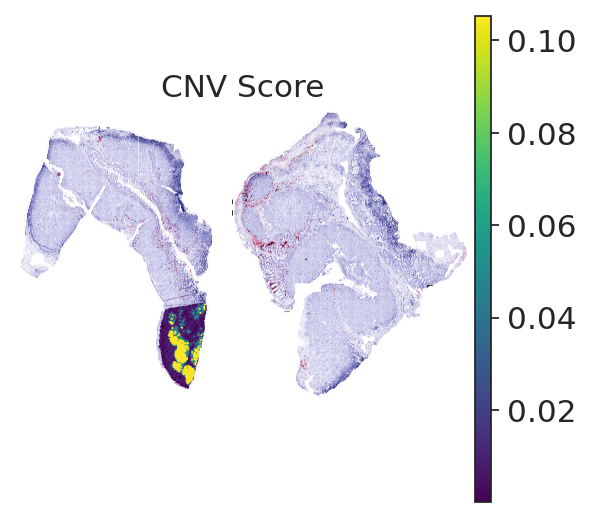

In [221]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00002_HE.img.shape[1],0,SG00002_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00002 Sample 8899-AS-4

In [222]:
a2 = sc.read("datasets/8899_4_SG00002_master.h5ad"); a2

AnnData object with n_obs × n_vars = 3636 × 19393
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [223]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00002/SG00002_downsample8_8899_4_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00002/SG00002_downsample8_8899_4_shape.csv",
    delimiter=",",
)

In [224]:
affine2

array([[ 5.23604393e-01, -8.51961525e-01,  1.08015395e+04],
       [ 8.51961525e-01,  5.23604393e-01,  1.65460027e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [225]:
shape2

array([3.377e+03, 3.288e+03, 3.000e+00])

In [226]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [227]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * 0.8

In [229]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2000
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 3000

In [232]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 8000
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 500

In [235]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 600

In [238]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 100
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 600

In [241]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 100
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 50

In [244]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 100
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 600

In [245]:
a2.obsm["spatial_ws"]

array([[11183.63812072,  4396.97129373],
       [ 9268.72267125,  3979.4150444 ],
       [10918.48672334,  4686.69615712],
       ...,
       [10732.53825019,  4503.31162852],
       [11351.41653785,  3828.10814433],
       [ 9486.66388962,  4757.24949037]])

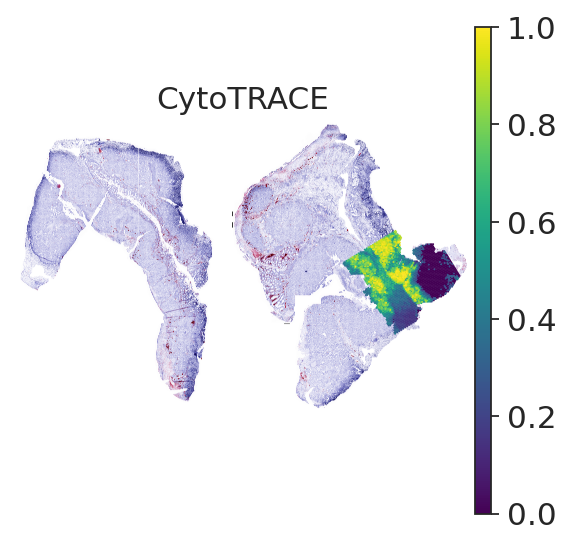

In [246]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00002_HE.img.shape[1],0,SG00002_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00002 Combined

In [247]:
a_ws = a1.concatenate([a2], fill_value=0)

In [248]:
a_ws

AnnData object with n_obs × n_vars = 5363 × 19346
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [249]:
a_ws.write("datasets/SG00002_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("datasets/SG00002_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("datasets/8899_3_SG00002_master.h5ad")
a2 = sc.read("datasets/8899_4_SG00002_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [ ]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CNV Clone"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00002_HE.img.shape[1],0,SG00002_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_SG00002_cnv_leiden.png"
)

---
# SG00003 Sample 8899-AS-5

In [4]:
a1 = sc.read("datasets/8899_5_SG00003_master.h5ad"); a1

AnnData object with n_obs × n_vars = 3502 × 19072
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [5]:
SG00003 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/SG00003/SG00003_downsample8.npz"); SG00003

Loading img object from /mnt/500gb_ssd/home/cody/images/MxIF/SG00003/SG00003_downsample8.npz...


img object with <class 'numpy.ndarray'> of float64 and shape 7754px x 12118px
24 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 7754px x 12118px

In [6]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/SG00003/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [7]:
SG00003_HE = img(img1, mask=SG00003.mask)
SG00003_HE.scale()
#WD84602_HE.img = WD84602_HE.img[::-1,::-1,:]
#WD84602_HE.mask = WD84602_HE.mask[::-1,::-1]

In [8]:
SG00003

img object with <class 'numpy.ndarray'> of float64 and shape 7754px x 12118px
24 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 7754px x 12118px

In [9]:
bg_img = SG00003_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][SG00003_HE.mask == 0] = 1.0  # area outside mask 1.0

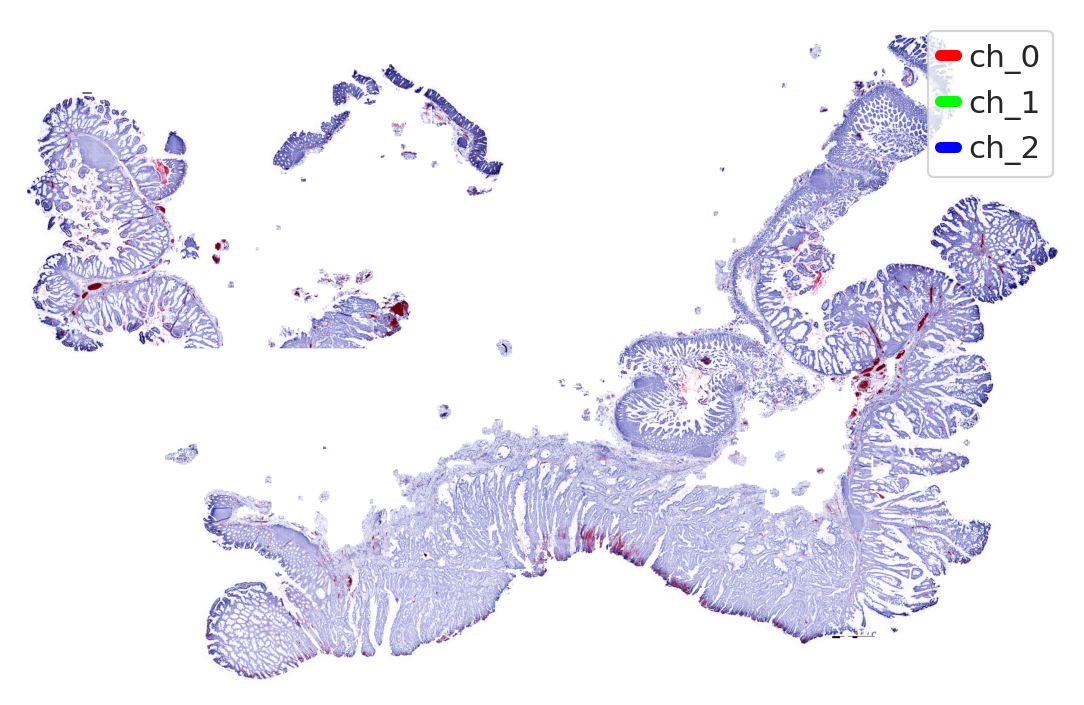

In [10]:
p = SG00003_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_SG00003_histology.png")

In [11]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00003/SG00003_downsample8_8899_5_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00003/SG00003_downsample8_8899_5_shape.csv",
    delimiter=",",
)

In [12]:
affine1

array([[ 9.12969243e-01, -4.08028384e-01,  2.28994245e+03],
       [ 4.08028384e-01,  9.12969243e-01,  3.51823562e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [13]:
shape1

array([4.191e+03, 4.310e+03, 3.000e+00])

In [14]:
shape1 * affine1[0,0]

array([3.82625410e+03, 3.93489744e+03, 2.73890773e+00])

In [15]:
scalef_adata1 = a1.uns["spatial"]["8899_AS_5"]["scalefactors"]["tissue_hires_scalef"]

In [16]:
scalef1 = affine1[0,0]

In [17]:
scalef_adata1

0.39223376

In [18]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [21]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * 0.8

In [22]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 900
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 500

In [25]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 2000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 2000

In [28]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 600
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 800

In [31]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 400
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 300

In [34]:
#a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 100
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 80

In [35]:
a1.obsm["spatial_ws"]

array([[2923.45190619, 6139.6513982 ],
       [4402.69393515, 6492.31687672],
       [2594.66345984, 7228.23679106],
       ...,
       [4235.02169842, 6383.20582765],
       [4092.34672064, 6833.80650532],
       [4220.03775871, 5930.4919207 ]])

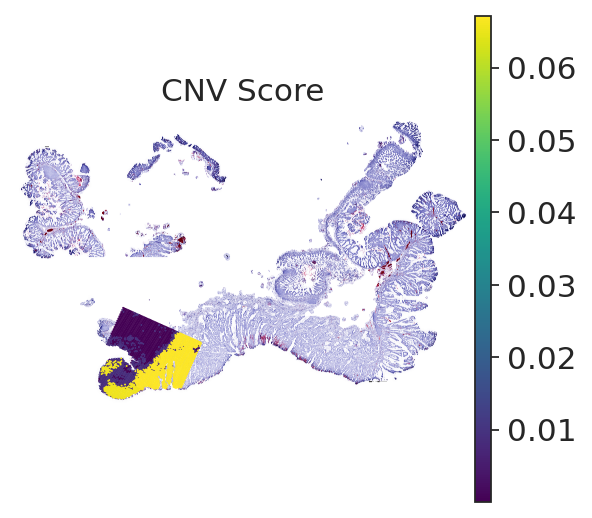

In [36]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00003_HE.img.shape[1],0,SG00003_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00003 Sample 8899-AS-6

In [37]:
a2 = sc.read("datasets/8899_6_SG00003_master.h5ad"); a2

AnnData object with n_obs × n_vars = 3578 × 19025
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [90]:
SG00003_HE = img(img1, mask=SG00003.mask)
SG00003_HE.scale()
SG00003_HE.img = SG00003_HE.img[::-1,::-1,:]
SG00003_HE.mask = SG00003_HE.mask[::-1,::-1]

In [91]:
bg_img = SG00003_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][SG00003_HE.mask == 0] = 1.0  # area outside mask 1.0

In [38]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00003/SG00003_downsample8_8899_6_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00003/SG00003_downsample8_8899_6_shape.csv",
    delimiter=",",
)

In [39]:
affine2

array([[ 1.09972469e-01, -9.93934634e-01,  4.03268293e+03],
       [ 9.93934634e-01,  1.09972469e-01,  2.43751652e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [40]:
shape2

array([3.954e+03, 3.253e+03, 3.000e+00])

In [93]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [94]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * 0.8

In [95]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2000

In [96]:
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2500
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 1500

In [97]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 200
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 500

In [98]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 50
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 50

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 4000
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 5000

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 3000
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 5000

In [ ]:
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 100
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500

In [99]:
a2.obsm["spatial_ws"]

array([[2168.65027248, 1303.48922551],
       [2615.53115395, 2767.22271142],
       [1057.05483749, 1572.16372917],
       ...,
       [2625.43054642, 2565.71181339],
       [2161.39277594, 2670.98169304],
       [3010.63965659, 2322.6753111 ]])

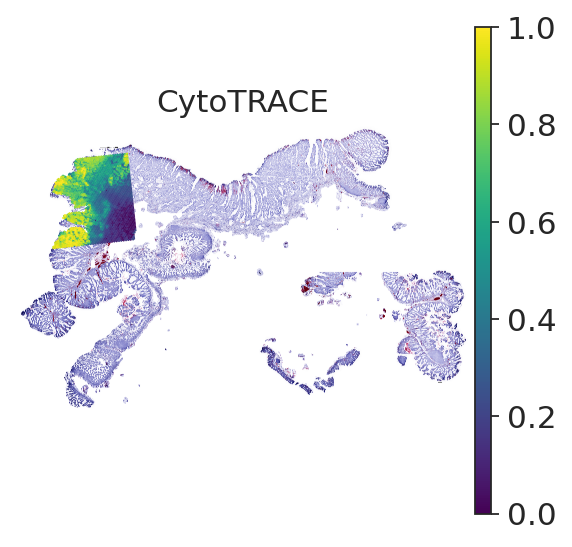

In [100]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00003_HE.img.shape[1],0,SG00003_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00003 Combined

In [101]:
# flip coords in second sample
a2.obsm["spatial_ws"][:,0] = SG00003_HE.img.shape[1] - a2.obsm["spatial_ws"][:,0]
a2.obsm["spatial_ws"][:,1] = SG00003_HE.img.shape[0] - a2.obsm["spatial_ws"][:,1]

In [102]:
a_ws = a1.concatenate([a2], fill_value=0)

In [103]:
a_ws

AnnData object with n_obs × n_vars = 7080 × 18801
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [104]:
a_ws.write("datasets/SG00003_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("datasets/SG00003_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("datasets/8899_5_SG00003_master.h5ad")
a2 = sc.read("datasets/8899_6_SG00003_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

In [105]:
SG00003_HE = img(img1, mask=SG00003.mask)
SG00003_HE.scale()

In [106]:
bg_img = SG00003_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][SG00003_HE.mask == 0] = 1.0  # area outside mask 1.0

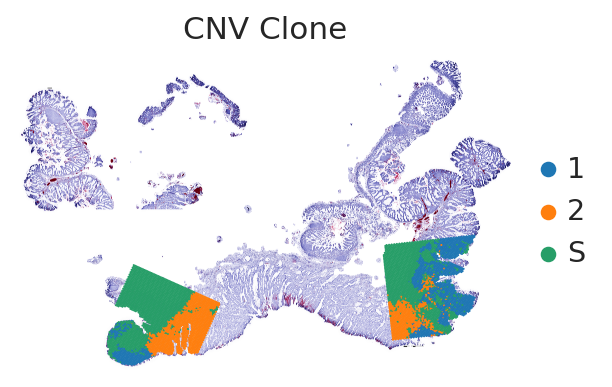

In [107]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CNV Clone"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00003_HE.img.shape[1],0,SG00003_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_SG00003_cnv_leiden.png"
)

---
# SG00004 Sample 8899-AS-7

In [108]:
a1 = sc.read("datasets/8899_7_SG00004_master.h5ad"); a1

AnnData object with n_obs × n_vars = 3731 × 19252
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [109]:
SG00004 = img.from_npz(file="/mnt/500gb_ssd/home/cody/images/MxIF/SG00004/SG00004_downsample8.npz"); SG00004

Loading img object from /mnt/500gb_ssd/home/cody/images/MxIF/SG00004/SG00004_downsample8.npz...


img object with <class 'numpy.ndarray'> of float64 and shape 8094px x 9631px
26 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'MUC2', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD45', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 8094px x 9631px

In [110]:
img1 = io.imread("/mnt/500gb_ssd/home/cody/images/MxIF/SG00004/VirtualStains/S002_VHE_stitched_downsample8.tif")

In [111]:
SG00004_HE = img(img1, mask=SG00004.mask)
SG00004_HE.scale()
#WD84602_HE.img = WD84602_HE.img[::-1,::-1,:]
#WD84602_HE.mask = WD84602_HE.mask[::-1,::-1]

In [112]:
SG00004

img object with <class 'numpy.ndarray'> of float64 and shape 8094px x 9631px
26 image channels:
	['AQP5', 'VIMENTIN', 'SOX9', 'SMA', 'PSTAT3', 'PEGFR', 'PCNA', 'PANCK', 'OLFM4', 'NAKATPASE', 'MUC5AC', 'MUC2', 'LYSOZYME', 'HLAA', 'GAMMAACTIN', 'FOXP3', 'CGA', 'CDX2', 'CD68', 'CD45', 'CD20', 'CD11B', 'CD8', 'CD4_', 'CD3D', 'BCATENIN']

tissue mask <class 'numpy.ndarray'> of float64 and shape 8094px x 9631px

In [113]:
bg_img = SG00004_HE.img
for i in [0, 1, 2]:  # for 3-channel image
    bg_img[:, :, i][SG00004_HE.mask == 0] = 1.0  # area outside mask 1.0

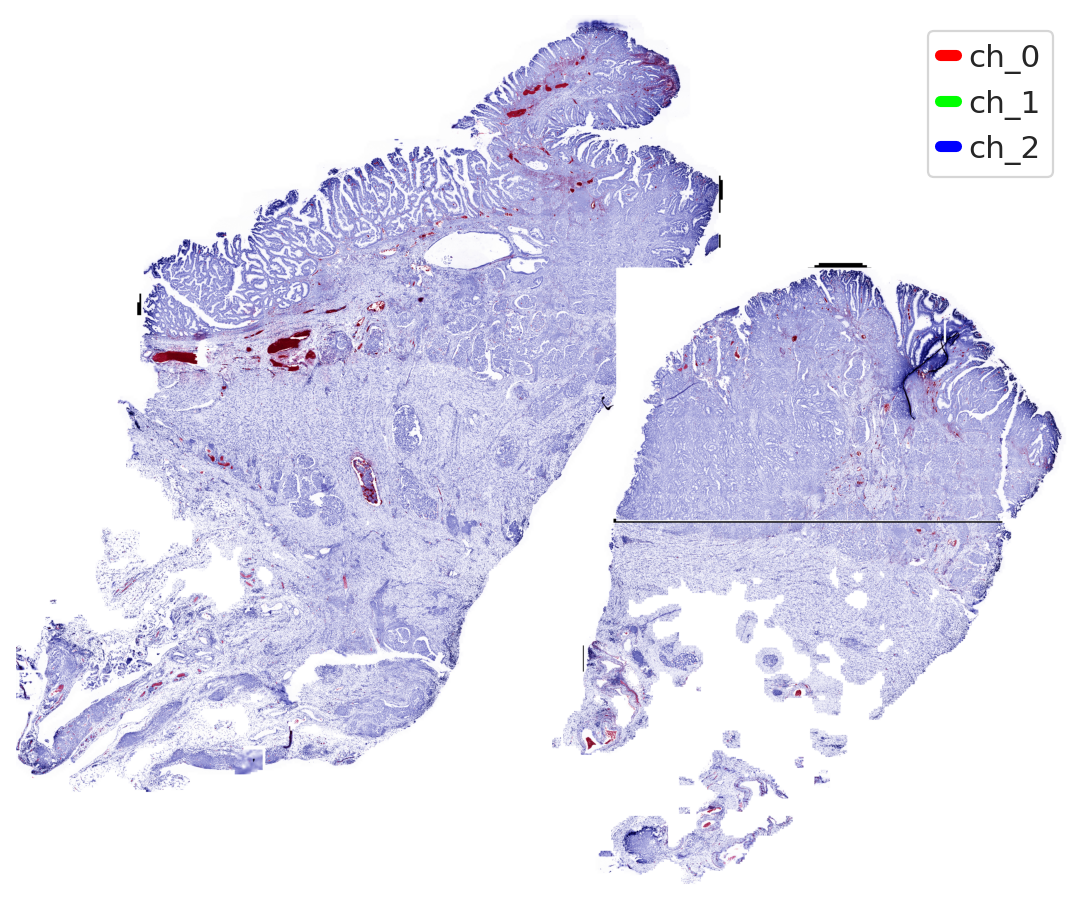

In [114]:
p = SG00004_HE.show(RGB=True, mask_out=False, save_to="plots_patient/wholeslide/show_SG00004_histology.png")

In [115]:
affine1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00004/SG00004_downsample8_8899_7_affine.csv",
    delimiter=",",
)
shape1 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00004/SG00004_downsample8_8899_7_shape.csv",
    delimiter=",",
)

In [116]:
affine1

array([[ 4.93841774e-01,  8.69551782e-01,  4.01673025e+03],
       [-8.69551782e-01,  4.93841774e-01,  4.34029979e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [117]:
shape1

array([3.253e+03, 3.688e+03, 3.000e+00])

In [118]:
shape1 * affine1[0,0]

array([1.60646729e+03, 1.82128846e+03, 1.48152532e+00])

In [119]:
scalef_adata1 = a1.uns["spatial"]["8899_AS_7"]["scalefactors"]["tissue_hires_scalef"]

In [120]:
scalef1 = affine1[0,0]

In [121]:
scalef_adata1

0.43946385

In [122]:
a1.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a1.obsm["spatial"]),
        np.zeros((a1.obsm["spatial"].shape[0],1))
    ]),
    affine1.T
)[:,:2]

In [129]:
a1.obsm["spatial_ws"] = a1.obsm["spatial_ws"] * 0.9

In [124]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 2000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 900

In [126]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 1000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 2000

In [130]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 1000
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 1000

In [133]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] + 700
a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 700

In [136]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 400
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 700

In [142]:
a1.obsm["spatial_ws"][:,0] = a1.obsm["spatial_ws"][:,0] - 100
#a1.obsm["spatial_ws"][:,1] = a1.obsm["spatial_ws"][:,1] + 700

In [143]:
a1.obsm["spatial_ws"]

array([[7683.17235874, 3743.58488514],
       [6830.28322684, 4452.57971495],
       [6795.26916537, 2440.28850702],
       ...,
       [6479.06932774, 3853.59975111],
       [6551.76719514, 2723.24871711],
       [7479.51972787, 3814.22797356]])

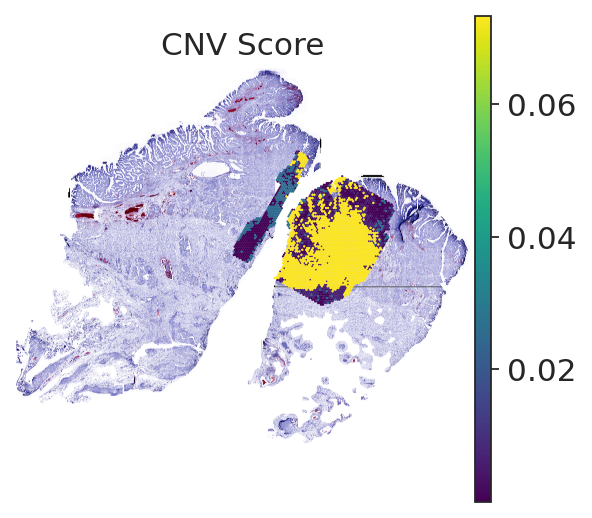

In [144]:
sc.pl.spatial(
    a1,
    basis="spatial_ws",
    color="CNV Score",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00004_HE.img.shape[1],0,SG00004_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00004 Sample 8899-AS-8

In [145]:
a2 = sc.read("datasets/8899_8_SG00004_master.h5ad"); a2

AnnData object with n_obs × n_vars = 3385 × 18694
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [146]:
affine2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00004/SG00004_downsample8_8899_8_affine.csv",
    delimiter=",",
)
shape2 = np.genfromtxt(
    "/mnt/500gb_ssd/home/cody/images/MxIF/SG00004/SG00004_downsample8_8899_8_shape.csv",
    delimiter=",",
)

In [147]:
affine2

array([[ 5.71017668e-02, -9.98368363e-01,  9.91974941e+03],
       [ 9.98368363e-01,  5.71017668e-02,  2.82383720e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [148]:
shape2

array([3.951e+03, 3.353e+03, 3.000e+00])

In [177]:
a2.obsm["spatial_ws"] = np.dot(
    np.column_stack([
        (a2.obsm["spatial"]),
        np.zeros((a2.obsm["spatial"].shape[0],1))
    ]),
    affine2.T
)[:,:2]

In [178]:
a2.obsm["spatial_ws"] = a2.obsm["spatial_ws"] * 0.8

In [179]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 2500
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 500

In [180]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 7000
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 2000

In [183]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] + 700
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 1500

In [186]:
a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 300
#a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] + 1500

In [189]:
#a2.obsm["spatial_ws"][:,0] = a2.obsm["spatial_ws"][:,0] - 300
a2.obsm["spatial_ws"][:,1] = a2.obsm["spatial_ws"][:,1] - 150

In [190]:
a2.obsm["spatial_ws"]

array([[8109.46751005, 3907.56813608],
       [6686.61450653, 5061.09769806],
       [8478.31489485, 5396.9364071 ],
       ...,
       [8028.32271381, 5276.8357951 ],
       [8897.99672801, 4973.08025353],
       [6804.49425036, 4908.51760108]])

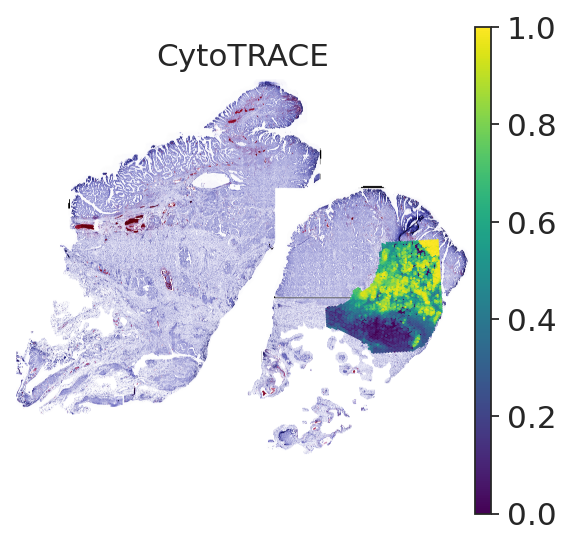

In [191]:
sc.pl.spatial(
    a2,
    basis="spatial_ws",
    color="CytoTRACE",
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00004_HE.img.shape[1],0,SG00004_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
)

---
# SG00004 Combined

In [192]:
a_ws = a1.concatenate([a2], fill_value=0)

In [193]:
a_ws

AnnData object with n_obs × n_vars = 7116 × 18606
    obs: 'in_tissue', 'array_row', 'array_col', 'Sample', 'Patient', 'Block ID', 'Tumor Type', 'Tumor Location', 'Tumor Stage', 'Tumor Grade', 'Gender', 'Ethnicity', 'pathology_annotation', 'STM_VUMCrefNMF30', 'END1_VUMCrefNMF30', 'BL1_VUMCrefNMF30', 'FIB1_VUMCrefNMF30', 'CRC1_VUMCrefNMF30', 'MYE1_VUMCrefNMF30', 'TL1_VUMCrefNMF30', 'MYE2_VUMCrefNMF30', 'CRC2_VUMCrefNMF30', 'CT_VUMCrefNMF30', 'SSC_VUMCrefNMF30', 'CRC3_VUMCrefNMF30', 'EE1_VUMCrefNMF30', 'MYE3_VUMCrefNMF30', 'PLA_VUMCrefNMF30', 'FIB2_VUMCrefNMF30', 'MYE4_VUMCrefNMF30', 'GOB_VUMCrefNMF30', 'MAS_VUMCrefNMF30', 'MYE5_VUMCrefNMF30', 'CRC4_VUMCrefNMF30', 'ABS_VUMCrefNMF30', 'TUF_VUMCrefNMF30', 'FIB3_VUMCrefNMF30', 'FIB4_VUMCrefNMF30', 'TL2_VUMCrefNMF30', 'END2_VUMCrefNMF30', 'TL3_VUMCrefNMF30', 'EE2_VUMCrefNMF30', 'BL2_VUMCrefNMF30', 'MILWRM Domain', 'MILWRM Confidence Score', 'CytoTRACE', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metapla

In [194]:
a_ws.write("datasets/SG00004_combined_ws.h5ad", compression="gzip")

---
### Replace old metadata with new

In [ ]:
a_ws = sc.read("datasets/SG00004_combined_ws.h5ad")

In [ ]:
del a_ws.obs

In [ ]:
a1 = sc.read("datasets/8899_7_SG00004_master.h5ad")
a2 = sc.read("datasets/8899_8_SG00004_master.h5ad")

In [ ]:
a = a1.concatenate([a2], fill_value=0)

In [ ]:
a_ws.obs = a_ws.obs.merge(a.obs, left_index=True, right_index=True)

---

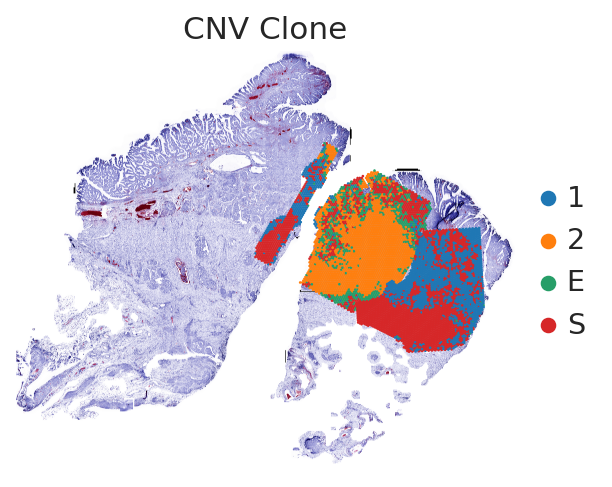

In [195]:
sc.pl.spatial(
    a_ws,
    basis="spatial_ws",
    color=["CNV Clone"],
    img=bg_img,
    spot_size=50,
    scale_factor=1,
    crop_coord=[0,SG00004_HE.img.shape[1],0,SG00004_HE.img.shape[0]],
    frameon=False,
    cmap="viridis",
    save="_SG00004_cnv_leiden.png"
)